In [6]:
import pandas as pd
import random
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import plotly.express as px

# Parameters
num_rows = 1000

# Simulated data for each column
dates = [datetime(2024, 1, 1) + timedelta(days=i) for i in range(num_rows)]
times = [random.choice(["Lunch", "Dinner"]) for _ in range(num_rows)]
customer_ids = [f"CUST{1000 + i}" for i in range(num_rows)]
age_groups = [random.choice(["20s", "30s", "40s", "50s", "60+"]) for _ in range(num_rows)]
nationalities = [random.choice(["Japan", "USA", "France", "China", "Australia", "UK"]) for _ in range(num_rows)]
meal_types = [random.choice(["Set Menu", "Tasting Menu"]) for _ in range(num_rows)]
wine_pairings = [random.choice(["Yes", "No"]) for _ in range(num_rows)]
beverage_sales = [round(random.uniform(50, 200), 2) if wine == "Yes" else round(random.uniform(0, 100), 2) for wine in wine_pairings]
food_sales = [round(random.uniform(150, 500), 2) for _ in range(num_rows)]
total_sales = [round(bev + food, 2) for bev, food in zip(beverage_sales, food_sales)]
special_requests = [random.choice(["None", "Vegetarian", "Gluten-Free", "Birthday", "Anniversary"]) for _ in range(num_rows)]
service_ratings = [random.randint(3, 5) for _ in range(num_rows)]  # Ratings between 3 and 5

# Create DataFrame
df = pd.DataFrame({
    "Date": dates,
    "Time": times,
    "Customer ID": customer_ids,
    "Customer Age Group": age_groups,
    "Customer Nationality": nationalities,
    "Meal Type": meal_types,
    "Wine Pairing": wine_pairings,
    "Beverage Sales": beverage_sales,
    "Food Sales": food_sales,
    "Total Sales": total_sales,
    "Special Requests": special_requests,
    "Service Rating": service_ratings
})

df


,Date,Time,Customer ID,Customer Age Group,Customer Nationality,Meal Type,Wine Pairing,Beverage Sales,Food Sales,Total Sales,Special Requests,Service Rating
0,2024-01-01,Dinner,CUST1000,40s,Australia,Set Menu,Yes,114.08,477.91,591.99,Anniversary,3
1,2024-01-02,Dinner,CUST1001,40s,Japan,Set Menu,Yes,117.52,307.57,425.09,Birthday,3
2,2024-01-03,Dinner,CUST1002,40s,France,Tasting Menu,Yes,90.57,233.94,324.51,Anniversary,5
3,2024-01-04,Dinner,CUST1003,60+,Japan,Tasting Menu,Yes,86.49,190.49,276.98,Birthday,5
4,2024-01-05,Lunch,CUST1004,50s,UK,Set Menu,No,54.84,429.21,484.05,Birthday,3
...,...,...,...,...,...,...,...,...,...,...,...,...
995,2026-09-22,Lunch,CUST1995,40s,UK,Set Menu,Yes,133.54,361.33,494.87,Birthday,4
996,2026-09-23,Dinner,CUST1996,30s,France,Set Menu,Yes,198.47,482.47,680.94,None,5
997,2026-09-24,Lunch,CUST1997,30s,UK,Set Menu,Yes,197.13,400.63,597.76,Birthday,5
998,2026-09-25,Dinner,CUST1998,30s,Japan,Tasting Menu,No,56.38,164.22,220.60,Birthday,4


In [4]:
# Assumptions
cogs_percentage = 0.30  # COGS assumed as 30% of total sales
overhead_percentage = 0.20  # Additional overhead cost as 20% of total sales
service_hours_per_session = 2  # Each session (lunch/dinner) is 2 hours
seating_capacity = 50  # Seating capacity of the restaurant

# Calculations

# Gross Profit Margin: [(Total Sales - COGS) / Total Sales] * 100
df['COGS'] = df['Total Sales'] * cogs_percentage
df['Gross Profit'] = df['Total Sales'] - df['COGS']
df['Gross Profit Margin (%)'] = (df['Gross Profit'] / df['Total Sales']) * 100

# Net Profit Margin: [(Total Sales - Total Expenses) / Total Sales] * 100
df['Overhead'] = df['Total Sales'] * overhead_percentage
df['Total Expenses'] = df['COGS'] + df['Overhead']
df['Net Profit'] = df['Total Sales'] - df['Total Expenses']
df['Net Profit Margin (%)'] = (df['Net Profit'] / df['Total Sales']) * 100

# Average Check Value: Total Sales / Number of Sales (or rows)
average_check_value = df['Total Sales'].mean()

# RevPASH: Total Sales / (Seating Capacity * Total Service Hours)
total_service_hours = service_hours_per_session * len(df)  # Total service hours across all rows (each row = 1 session)
rev_pash = df['Total Sales'].sum() / (seating_capacity * total_service_hours)

# Aggregating results
kpi_results = {
    "Average Gross Profit Margin (%)": df['Gross Profit Margin (%)'].mean(),
    "Average Net Profit Margin (%)": df['Net Profit Margin (%)'].mean(),
    "Average Check Value": average_check_value,
    "RevPASH": rev_pash
}

kpi_results


{'Average Gross Profit Margin (%)': 70.0,
 'Average Net Profit Margin (%)': 50.0,
 'Average Check Value': 418.87030000000004,
 'RevPASH': 4.188703}

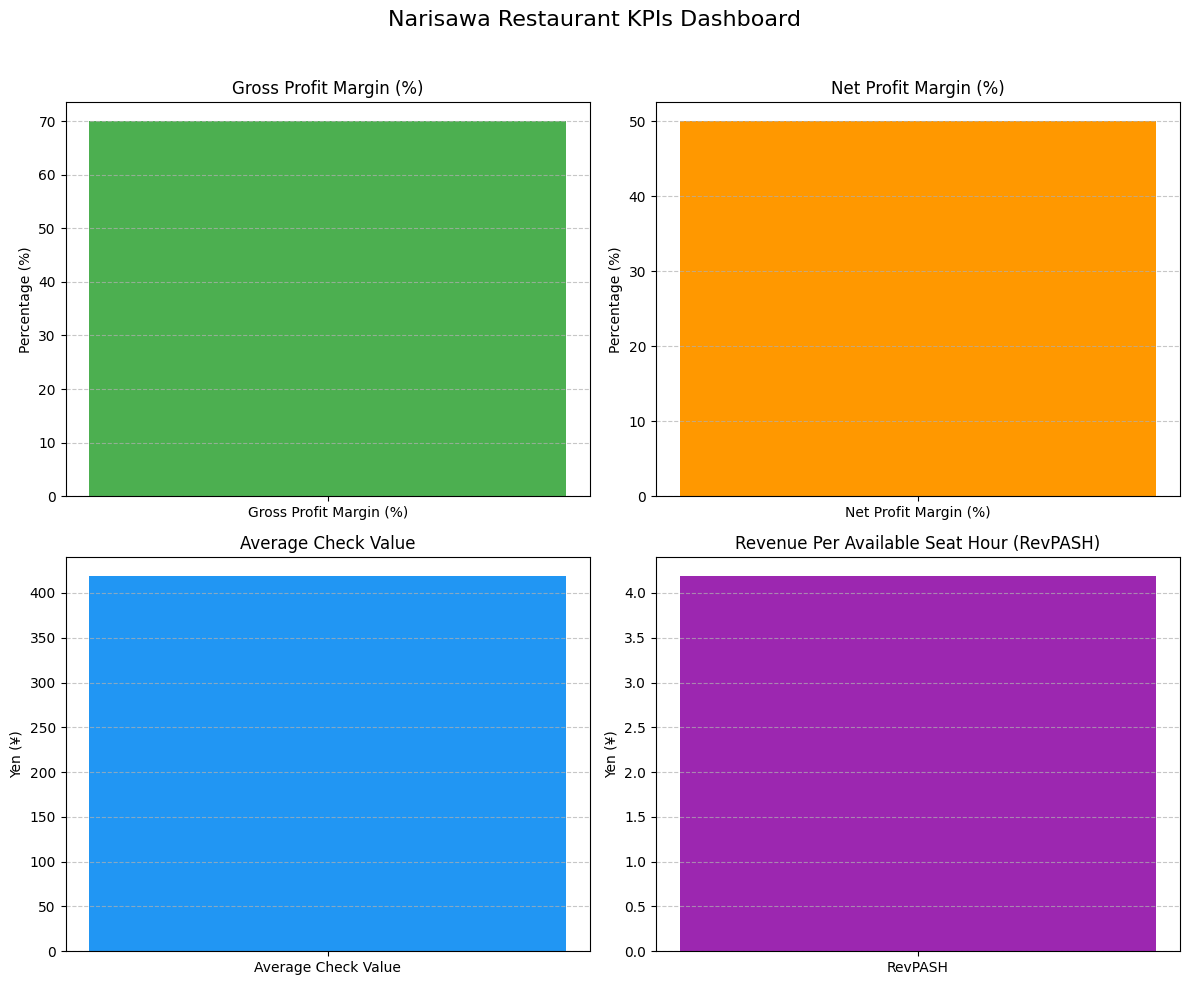

In [7]:
# Creating subplots to display each KPI on its own graph

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle("Narisawa Restaurant KPIs Dashboard", fontsize=16)

# Gross Profit Margin
axes[0, 0].bar(["Gross Profit Margin (%)"], [kpi_results["Average Gross Profit Margin (%)"]], color='#4CAF50')
axes[0, 0].set_ylabel("Percentage (%)")
axes[0, 0].set_title("Gross Profit Margin (%)")
axes[0, 0].grid(axis='y', linestyle='--', alpha=0.7)

# Net Profit Margin
axes[0, 1].bar(["Net Profit Margin (%)"], [kpi_results["Average Net Profit Margin (%)"]], color='#FF9800')
axes[0, 1].set_ylabel("Percentage (%)")
axes[0, 1].set_title("Net Profit Margin (%)")
axes[0, 1].grid(axis='y', linestyle='--', alpha=0.7)

# Average Check Value
axes[1, 0].bar(["Average Check Value"], [kpi_results["Average Check Value"]], color='#2196F3')
axes[1, 0].set_ylabel("Yen (¥)")
axes[1, 0].set_title("Average Check Value")
axes[1, 0].grid(axis='y', linestyle='--', alpha=0.7)

# RevPASH
axes[1, 1].bar(["RevPASH"], [kpi_results["RevPASH"]], color='#9C27B0')
axes[1, 1].set_ylabel("Yen (¥)")
axes[1, 1].set_title("Revenue Per Available Seat Hour (RevPASH)")
axes[1, 1].grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout for clarity
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


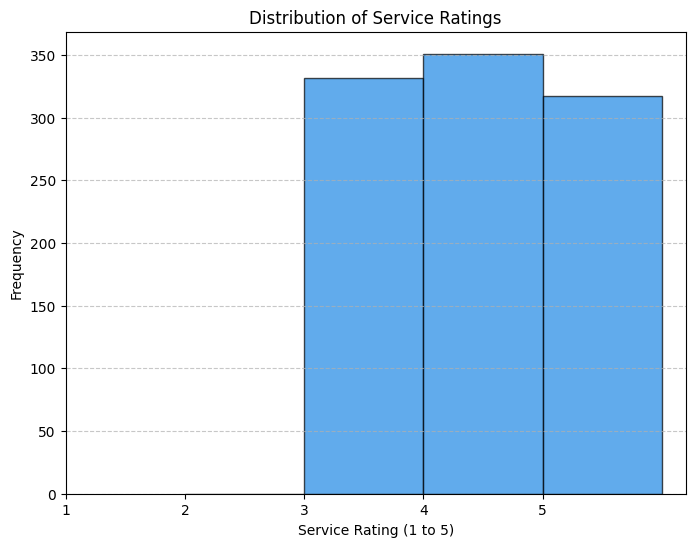

In [8]:
# Visualizing the distribution of Service Ratings from the dataset

# Setting up figure size and title
plt.figure(figsize=(8, 6))
plt.hist(df['Service Rating'], bins=range(2, 7), color='#1E88E5', edgecolor='black', alpha=0.7)

# Adding titles and labels
plt.title("Distribution of Service Ratings")
plt.xlabel("Service Rating (1 to 5)")
plt.ylabel("Frequency")
plt.xticks(range(1, 6))  # Ratings from 1 to 5
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()


<ipython-input-11-1aa2d787f530>:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  months = pd.date_range(start="2024-01-01", periods=12, freq='M')


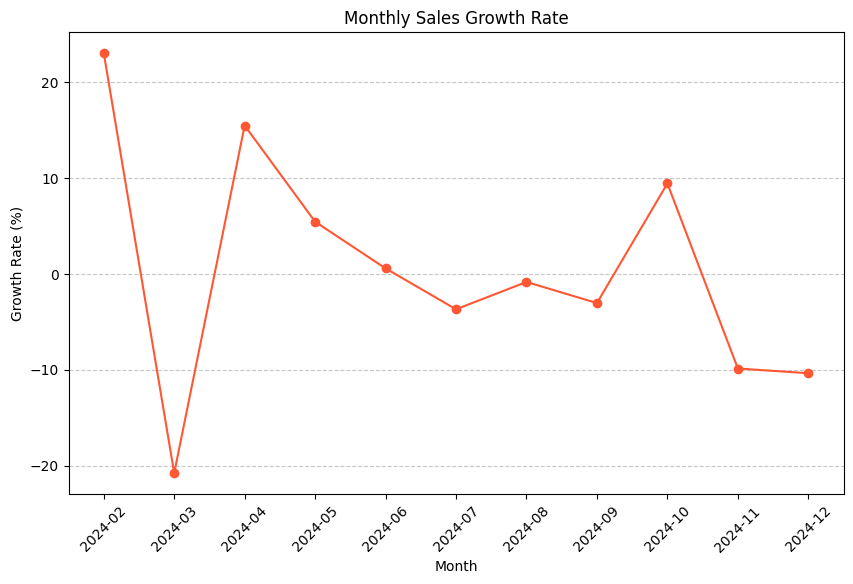

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta

# Generating sample data for 12 months
months = pd.date_range(start="2024-01-01", periods=12, freq='M')
monthly_sales_values = [round(50000 + np.random.normal(0, 5000), 2) for _ in range(12)]

# Create a DataFrame for monthly sales
monthly_sales_df = pd.DataFrame({
    "Month": months,
    "Total Sales": monthly_sales_values
})

# Calculate the Monthly Sales Growth Rate
monthly_sales_df['Monthly Sales Growth Rate (%)'] = monthly_sales_df['Total Sales'].pct_change() * 100

# Plotting the Monthly Sales Growth Rate
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales_df['Month'].dt.strftime('%Y-%m'),
         monthly_sales_df['Monthly Sales Growth Rate (%)'],
         marker='o', color='#FF5733', linestyle='-', linewidth=1.5)
plt.title("Monthly Sales Growth Rate")
plt.xlabel("Month")
plt.ylabel("Growth Rate (%)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()

